# **Scikit-Learn**

* **Scikit-Learn 문법의 공통점**
    1. 모델 불러오기 및 정의
            from sklearn.svm import SVC
            clf = SVC(C=1.0, kernel='rbf', random_state=2019)
        * hyper-parameter 세팅
    
    2. fit
            clf.fit(x_train, y_train)
        * (훈련)데이터로 모델 학습 또는 특징 추출
    
    3. predict or predict_proba or transform
            y_pred = clf.predict(x_test)
        * (테스트)데이터 라벨(확률) 예측 또는 변환
    
    4. scoring
            accuracy_score(y_test, y_pred)
        * 정확도, AUC, R2 등 적절한 스코어 함수로 결과 확인
    

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

abalone_path = join('abalone.txt')
column_path = join('abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
    abalone_columns.append(l.strip())

In [2]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
# 성별 컬럼 삭제
del data['Sex']

In [6]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


---
## **1. Scaling**

## **스케일링을 왜 해야할까요?**
* 변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.
* Sklearn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다.

    1. Min-Max Scaling
        * Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다.
        * Sklearn에서 Min-Max Scaler는 preprocessing 패키지에 있습니다.

### 1) 모델 불러오기 및 정의하기

In [9]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()

### 2) 데이터에서 특징 찾기(Min, Max 값)

In [10]:
mMscaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

### 3) 데이터 변환

In [11]:
# 첫번째 방법
mMscaled_data = mMscaler.transform(data)

In [12]:
# 두번째 방법
mMscaled_data = mMscaler.fit_transform(data)

In [13]:
print(mMscaled_data.min())
print(mMscaled_data.max())

0.0
1.0


### 4) 결과 살펴보기

In [14]:
mMscaled_data = pd.DataFrame(mMscaled_data, columns = data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


---
## **2. Standard Scaling**
* z-score라고 하는 데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다.
* 데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.
* Sklearn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

### 1. 모델 불러오기 및 정의하기

In [15]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

sdscaler = StandardScaler()

### 2. 데이터에서 특징 찾기(Mean, Std 값)

In [16]:
sdscaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

### 3. 데이터 변환

In [17]:
sdscaled_data = sdscaler.transform(data)

### 4. 결과 살펴보기

In [18]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns)
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


* 기존 데이터에서는 변수별로 서로 다른 평균과 표준 편차값을 가지고 있었습니다.
* 그러나 위에서 Scaling과 Standard Scaling으로 데이터를 처리한 후 살펴보면,평균이 0 표준편차가 1이 되었음을 확인할 수 있습니다.

---
## **Sampling**

### **샘플링은 왜 할까요?**
* 클래스 불균형
    * 클래스 불균형이란, 분류를 목적으로 하는 데이터 셋에 클래스 라벨의 비율이 균형을 맞추지 않고, 한쪽으로 치우친 경우를 말합니다.
    * 이런 경우 모델이 각 클래스의 데이터를 제대로 학습하기 어려워집니다. 따라서 각 클래스별 균형을 맞추는 작업이 필요합니다.

#### 샘플링은 다음과 같이 크게 두 가지로 나눌 수 있습니다.
* 적은 클래스의 데이터 수를 증가시키는 Oversampling
* 많은 클래스의 데이터 수를 감소시키는 Undersampling

## **1. Random Over, Under Sampling**
* 가장 쉽게 (Over, Under) 샘플링 하는 방법은 임의(Random)로 데이터를 선택하여, 복제하거나 제거하는 방식을 사용할 수 있습니다. 하지만 이러한 방식은 몇가지 문제점이 있습니다.
    1. 복제하는 경우, 선택된 데이터의 위치에 똑같이 점을 찍기 때문에 데이터 자체에 과적합될 수 있음
    2. 제거하는 경우, 데이터셋이 가지고 있는 정보의 손실이 생길 수 있음
* 샘플링 알고리즘은 클래스 불균형 처리를 위한 imblearn(imbalanced-learn) 라이브러리에 있습니다.
    * Random Over, Under Sampler는 imblearn 라이브러리의 over_sampling, under_sampling 패키지에 있습니다.

### 1) 모델 불러오기 및 정의하기

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

### 2, 3) 데이터에서 특징 찾기 (데이터 비율) / 데이터 샘플링

In [21]:
# 데이터에서 특징을 학습함과 동시에 데이터 샘플링

# Over 샘플링
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

# Under 샘플링
undersampled_data, underampled_label = rus.fit_resample(data, label)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

### 4) 결과 살펴보기

In [22]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nRandom Over 샘플링 결과 \n{}'.format(pd.get_dummies(oversampled_label).sum()))
print('\nRandom Under 샘플링 결과 \n{}'.format(pd.get_dummies(underampled_label).sum()))

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

Random Over 샘플링 결과 
F    1528
I    1528
M    1528
dtype: int64

Random Under 샘플링 결과 
F    1307
I    1307
M    1307
dtype: int64


## **2. SMOTE(Synthetic Minority Oversampling Technique)**
* Random Over, Under Sampling은 데이터의 중복이로 인한 과적합 문제와 데이터 손실의 문제가 있습니다.
* 이런 문제를 최대한 피하면서 데이터를 생성하는 SMOTE 알고리즘이 있습니다.
* SMOTE의 기본 개념은 어렵지 않습니다. 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터 샘플을 찾고 그 사이에 새로운 점을 생성합니다.
* SMOTE의 장점으로는 데이터의 손실이 없으며 Over Sampling을 했을 때 보다 과적합을 완화할 수 있습니다.

* 전복 데이터셋은 SMOTE로 생성되는 데이터 샘플을 살펴보기 어려우므로, 임의의 데이터 샘플을 생성해 살펴보겠습니다.
* 1,000개의 데이터 샘플이 5:15:80 비율로 되어있으며, 2차원 데이터를 생성합니다.
* SMOTE는 imblearn 라이브러리의 over_sampling 패키지에 있습니다.

In [23]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples = 1000, n_features = 2, n_informative = 2,
                                 n_redundant = 0, n_repeated = 0, n_classes = 3,
                                  n_clusters_per_class = 1,
                                 weights = [0.05, 0.15, 0.8],
                                 class_sep = 0.8, random_state = 2019)

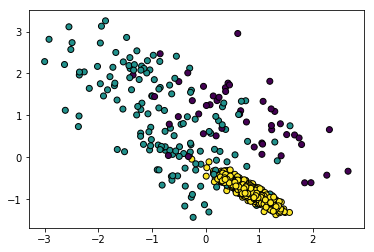

In [24]:
fig = plt.Figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], c = label, linewidths = 1, edgecolors = "black")
plt.show()

### 1) 모델 불러오기 및 정의하기

In [25]:
from imblearn.over_sampling import SMOTE
## k_neighbors 파라미터로 가까운 데이터의 샘플의 수를 결정할 수 있습니다.
smote = SMOTE(k_neighbors = 5)

### 2, 3) 데이터에서 특징 찾기 (데이터 비율) / 데이터 샘플링

In [26]:
smoted_data, smoted_label = smote.fit_resample(data, label)

### 4) 결과 살펴보기

In [27]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64

SMOTE 결과 
0    793
1    793
2    793
dtype: int64


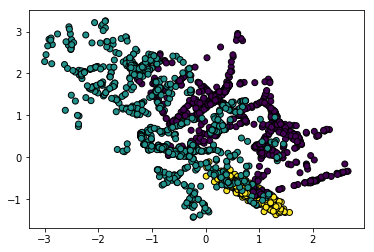

In [28]:
fig = plt.Figure(figsize=(12, 6))
plt.scatter(smoted_data[:, 0], smoted_data[:, 1], c = smoted_label, linewidths = 1,
           edgecolors = 'black')
plt.show()

---
## **Dimensionality Reduction**

## **차원 축소는 왜 해야할까요? - 차원의 저주**
* 차원의 저주는 저차원에서는 일어나지 않는 현상들이 고차원에서 데이터를 분석하거나 다룰 때 생겨나는 현상을 말합니다.
* 고차원으로 올라갈수록 공간의 크기가 증가하는데, 데이터는 해당 공간에 한정적으로 위치되어 빈 공간이 많아지기 때문에 발생합니다.
* 이런 이유로 데이터의 차원이 너무 큰 경우 필요없는 변수를 제거하고, 과적합을 방지하기 위해 데이터의 차원을 축소합니다. 또는 사람이 인식할 수 있는 차원은 3차원이 최대이므로 데이터의 시각화를 위해 차원을 축소하기도 합니다.

## **1. 주성분 분석(Principal Component Analysis, PCA)**
* 대표적인 차원 축소 기법으로 주성분 분석(PCA)이라는 방법이 있습니다.
* PCA는 여러 차원으로 이루어진 데이터를 가장 잘 표현하는 축으로 Projection 하여 차원을 축소하는 방식을 사용합니다.
* 데이터를 가장 잘 표현하는 축이란, 데이터의 분산을 잘 표현하는 축이라고 할 수 있습니다.
* 기본적으로 주성분(Principal Component, PC)은 데이터셋을 특이값 분해하여 추출된 고유 벡터입니다.
* 각 고유 벡터들은 서로 직교성을 띄기 때문에 데이터를 주성분으로 Projection 시켰을 때 서로 독립적으로 데이터를 잘 표현할 수 있습니다.
* PCA의 단점으로는 떨어뜨린 주성분이 어떤 컬럼인지 설명할 수 없다는 점입니다.

### 주성분 분석의 단계
* 각 컬럼들의 값의 범위를 평균과 표준편차를 사용해 정규화시켜 동일하게 만들어줍니다. (스케일링)
* 데이터의 공분산을 계산합니다.
* 공분산 행렬에 대해 특이값 분해를 하여 주성분(고유 벡터)과 고유값을 얻어냅니다.
* 주성분과 대응되는 고유값은 주성분이 데이터의 분산을 표현하는 정도의 척도로 사용되므로, 고유값의 크기와 비율을 보고 몇개의 주성분을 선택할 것인지 또는 원하는 차원의 개수만큼의 주성분을 선택합니다.
* 선택한 주성분으로 모든 데이터를 Projection시켜 데이터의 차원을 축소합니다.

### Projection(사영)
* 벡터 공간에서 어떤 벡터 a와 b가 있을 때 벡터 b를 a에 사영한 결과(x)는 아래 그림과 같습니다.
* 벡터 b를 벡터 a에 사양한다는 것은 벡터 a에 대해 수직 방향으로 벡터 b를 떨어뜨리는 것을 의미합니다.
* 간단하게 벡터 b의 그림자를 벡터 a에 떨어뜨린 것을 생각하면 편합니다.
* PCA의 기본 원리는 데이터의 분산을 가장 잘 표현하는 벡터(축)를 찾아 해당 벡터에 데이터들을 사양 시키는 것입니다.


In [29]:
from sklearn.datasets import load_digits

digits = load_digits()

이번에는 sklearn의 내장 데이터인 64차원(8*8) digit(숫자 이미지) 데이터를 PCA를 통해 2차원으로 떨어뜨려 시각화를 통해 살펴보겠습니다.

In [30]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [35]:
data = digits.data
label = digits.target

In [36]:
data.shape

(1797, 64)

숫자 이미지가 64차원 벡터(1797, 64)로 표현되어 있으므로 이미지를 확인하기 위해서는 (8, 8) 행렬로 변환해주어야 합니다.

Label: 0


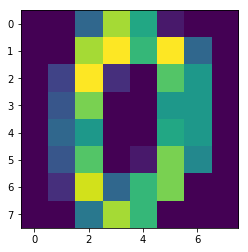

In [37]:
plt.imshow(data[0].reshape((8, 8)))
print('Label: {}'.format(label[0]))

위의 사진을 보면 데이터는 숫자 0으로 보이고, 라벨도 0입니다.
PCA를 통해서 64차원 데이터를 2차원 데이터로 차원 축소시키겠습니다.
* 여기에서 digits 데이터의 각 픽셀(변수)의 스케일은 0 ~ 16으로 같으므로 추가적인 정규화를 하지 않습니다.

### 1) 모델 불러오기 및 정의하기

In [65]:
# Principal component analysis (PCA)
from sklearn.decomposition import PCA

# n_components: 고유 벡터 몇개 쓸거니? 몇 차원으로 줄일거니?
# n_components = 2 고유 벡터 2개 쓸거야, 2차원으로 줄일거야
pca = PCA(n_components = 2)

# n_components가 실수일 경우 해당 퍼센트에 맞는 n_components를 알아서 뽑아낸다.
# pca = PCA(n_components = 0.8)

### 2) 데이터 찾기(주성분으로 데이터 사영하기)

In [66]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
# n_components가 0.8 즉, 64차원의 데이터의 80% 분산을 표현하면 13개의 벡터로 표현 가능하다.
pca.n_components_

2

### 3) 데이터 변환(주성분으로 데이터 사영하기)

In [68]:
new_data = pca.transform(data)

### 4) 결과 살펴보기

In [69]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('\n PCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)

 PCA를 거친 데이터의 차원 
(1797, 2)


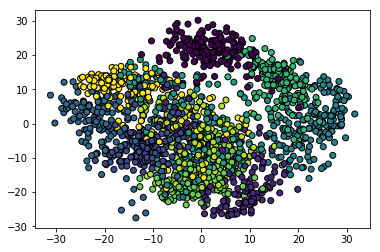

In [70]:
plt.scatter(new_data[:, 0], new_data[:, 1],
            c = label, linewidths = 1, edgecolors = 'black')
plt.show()

---
## **Categorical Variable to Numeric Variable**
* 범주형 변수를 수치형 변수로 나타내는 방법을 알아보겠습니다.
* 범주형 변수란, 차의 등급을 나타내는 [소형, 중형, 대형]처럼 표현되는 변수를 말합니다.
* 범주형 변수는 주로 데이터 상에서 문자열로 표현되는 경우가 많으며, 문자와 숫자가 매핑되는 형태로 표현되기도 합니다.

## **1. Label Encoding**
* 라벨 인코딩은 n개의 범주형 데이터를 0 ~ n-1의 연속적인 수치 데이터로 표현합니다.
* 예를 들어, 차의 등급은 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현 가능합니다.
    * 소형: 0
    * 중형: 1
    * 대형: 2
* 라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이가 아니라는 것을 주의해야 합니다.
* Label Encoding은 Sklearn의 preprocessing 패키지에 있습니다.
* 이번에는 전복 데이터의 target이었던, 성별 변수를 수치형 변수로 변환하겠습니다.

In [73]:
data = pd.read_csv(abalone_path, header = None, names = abalone_columns)
label = data['Sex']
del data

In [75]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

### 1) 모델 불러오기 및 정의하기

In [77]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

### 2) 데이터에서 특징 찾기(범주의 수)

In [79]:
le.fit(label)

LabelEncoder()

### 3) 데이터 변환(범주형 변수를 수치형 변수로 변환)

In [81]:
# transform: 범주형 변수를 label로 변환하기 위해 사용
label_encoded_label = le.transform(label)

### 4) 결과 살펴보기

In [83]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), label_encoded_label.reshape((-1, 1))], axis=1), 
                      columns=['label', 'label_encoded'])

result.head(10)

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
5,I,1
6,F,0
7,F,0
8,M,2
9,F,0


In [85]:
# 수치형 데이터를 다시 범주형 데이터로 표현
le.inverse_transform(label_encoded_label)

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

## **2. One-hot Encoding**
* 원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0, 1) 벡터로 표현합니다.
* 예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원한 인코딩으로 변환하면 아래처럼 표현할 수 있습니다.
    * 소형: [1, 0, 0]
    * 중형: [0, 1, 0]
    * 대형: [0, 0, 1]
* 원한 인코딩으로 범주형 데이터를 나타내면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. 이는 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현하는 것입니다.
* One-hot Encoding은 Sklearn의 preprocessing 패키지에 있습니다.

### 1) 모델 불러오기 및 정의하기

In [86]:
# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

### 2, 3) 데이터에서 특징 찾기(범주의 수) / 데이터 변환(범주형 변수를 수치형 변수로)

In [91]:
label.values.shape

(4177,)

In [92]:
# -1: 맨 마지막 차원은 아무거나 1개로 채워줘라
one_hot_encoded = ohe.fit_transform(label.values.reshape((-1, 1)))

### 4) 결과 살펴보기

In [ ]:
columns = np.concatenate([np.array(['label']) , ohe.categories_[0]])
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), one_hot_encoded.reshape((-1, 3))], axis=1), 
                      columns=columns)

result.head(10)